In [9]:
%pip install numpy matplotlib sympy 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import *

init_printing()
pp = pretty_print

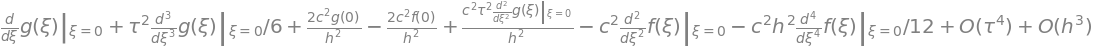

In [11]:
x = Symbol("x")
t = Symbol("t")
h = Symbol("h")
tau = Symbol("tau")

c = Symbol("c")

f = Function("f")(x)
g = Function("g")(t)

sf = lambda val: series(f, x, 0, 5).subs({x: val})
sg = lambda val: series(g, t, 0, 5).subs({t: val})

r = (sg(tau) - sg(-tau)) / 2 / tau - c**2 * (sf(-h) - (sg(tau) + sg(-tau)) +sf(h)) / h**2 

r
simplify(r)

# Задача с системой

In [12]:
A = Matrix([
    [-1, 0, 1], 
    [0, -1, 3], 
    [-1, 3, -3]
])


def get_result(): 
    evals = []
    evecs = []
    for n, _, vec in A.eigenvects():
        evals += [n]
        evecs += [vec]

    pp(list(zip(evals, evecs)))

    l_cnt = 0
    r_cnt = 0 
    for eval in evals:
        if eval > 0: l_cnt += 1
        else: r_cnt += 1

    pp(f"На левой границе {l_cnt}, на правой {r_cnt} гранусловий!")

get_result()

⎡⎛    ⎡⎡-1/4⎤⎤⎞  ⎛    ⎡⎡3⎤⎤⎞  ⎛   ⎡⎡1/2⎤⎤⎞⎤
⎢⎜    ⎢⎢    ⎥⎥⎟  ⎜    ⎢⎢ ⎥⎥⎟  ⎜   ⎢⎢   ⎥⎥⎟⎥
⎢⎜-5, ⎢⎢-3/4⎥⎥⎟, ⎜-1, ⎢⎢1⎥⎥⎟, ⎜1, ⎢⎢3/2⎥⎥⎟⎥
⎢⎜    ⎢⎢    ⎥⎥⎟  ⎜    ⎢⎢ ⎥⎥⎟  ⎜   ⎢⎢   ⎥⎥⎟⎥
⎣⎝    ⎣⎣ 1  ⎦⎦⎠  ⎝    ⎣⎣0⎦⎦⎠  ⎝   ⎣⎣ 1 ⎦⎦⎠⎦
На левой границе 1, на правой 2 гранусловий!


# Таблица разделенных разностей

In [13]:
h = Symbol("h")
n, m = symbols("n m", integer=True)
y = Function("y")
x = symbols("x")

xs = [
    -3*h, 
    -2*h, 
    -1*h, 
    0
]

fs = [ 
    y(m-3, n),
    y(m-2, n),
    y(m-1, n), 
    y(m, n) 
]

def get_result():
    N = len(xs)
    M = N - 1

    deltas = []

    deltas += [[
        together((fs[i+1] - fs[i]) / (xs[i+1] - xs[i])) for i in range(N-1)
    ]]

    for j in range(1, M): 
        deltas.append([
            together((deltas[j-1][i+1] - deltas[j-1][i]) / (xs[i+j+1] - xs[i])) for i in range(len(deltas[j-1])-1) 
        ])

    _mults = [1]


    for i in range(1, M+1): 
        _mults.append(
            _mults[i-1] * (x - xs[i-1])
        )

    for i in range(M): 
        pp((_mults[i+1], deltas[i][0]))

get_result()

⎛         -y(m - 3, n) + y(m - 2, n)⎞
⎜3⋅h + x, ──────────────────────────⎟
⎝                     h             ⎠
⎛                     y(m - 3, n) - 2⋅y(m - 2, n) + y(m - 1, n)⎞
⎜(2⋅h + x)⋅(3⋅h + x), ─────────────────────────────────────────⎟
⎜                                           2                  ⎟
⎝                                        2⋅h                   ⎠
⎛                             y(m, n) - y(m - 3, n) + 3⋅y(m - 2, n) - 3⋅y(m - 
⎜(h + x)⋅(2⋅h + x)⋅(3⋅h + x), ────────────────────────────────────────────────
⎜                                                         3                   
⎝                                                      6⋅h                    

1, n)⎞
─────⎟
     ⎟
     ⎠
